In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import PIL
import requests
from PIL import Image,UnidentifiedImageError
from io import BytesIO
import cv2
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt


Scraping the data from reddit

In [ ]:
import praw
def fetch_data(subreddit_name, data):

      # create a Reddit instance
      reddit = praw.Reddit(client_id="dRrYbn5ICEkDLteUSiThVA",
                         client_secret="V2Fbw12k3qXKS4zuWK1VRCRep2PvKA",
                         user_agent="metadata 2.0")

      sub = reddit.subreddit(subreddit_name)
      posts = sub.top(time_filter='month', limit=None)

    # iterate through the new posts and add them to the list
      for post in posts:
              data.append({
                  "id": post.id,
                  "title": post.title,
                  "author": post.author,
                  "author_flair_text": post.author_flair_text,
                  "created_at": post.created_utc,
                  "url": post.url,
                  "flair": post.link_flair_text,
                  "is_original_content": post.is_original_content,
                  "distinguished": post.distinguished,
                  "is_self": post.is_self,
                  "selftext": post.selftext,
                  "is_spoiler": post.spoiler,
                  "is_over_18": post.over_18,
                  "subreddit": post.subreddit,
                  "is_stickied": post.stickied,
                  "is_edited": post.edited,
                  "is_locked": post.locked,
                  "num_comments" : post.num_comments,
                  "upvote_ratio": post.upvote_ratio,
                  "score": post.score
                })

      return posts

In [ ]:
#  creating list to store data
data_earth = []
data_pics = []


In [ ]:
fetch_data("earthporn", data_earth)
fetch_data("pics", data_pics)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
print(len(data_earth))
print(len(data_pics))

2995
2989


In [ ]:
df_pics= pd.DataFrame(data_pics)
df_earth= pd.DataFrame(data_earth)

In [ ]:
def remove_duplicates(df):
  # for some reason it's not removing all of the duplicates so checking for unique post ids
  df.drop_duplicates( keep='first',inplace=True)
  print(df.shape)
  # Check if the 'id' column has unique values
  has_unique_values = df['id'].nunique() == df.shape[0]
  print(has_unique_values)
  dup = df['id'].duplicated()

  idx1= df[dup].index
  df= df.drop(idx1)

  return df

In [ ]:
df_pics = remove_duplicates(df_pics)
df_earth = remove_duplicates(df_earth)

print(df_pics.shape)
print(df_earth.shape)

(2844, 20)
True
(2895, 20)
True
(2844, 20)
(2895, 20)


Preprocessing before making into a csv


In [ ]:
# Since stickied posts are usually some type of annoucement made by the admins of the sub and does not have anything to do with the sub's theme
def remove_stickied_posts(df):
    df = df[df["is_stickied"] == False]

    return df


# Since mods mostly make posts that are ruless or event annoucements
def remove_mod_posts(df):
    df = df[df["distinguished"] != "moderator"]

    return df

In [ ]:
df_earth= remove_stickied_posts(df_earth)
df_pics = remove_stickied_posts(df_pics)

df_earth= remove_mod_posts(df_earth)
df_pics = remove_mod_posts(df_pics)


print(df_pics.shape)
print(df_earth.shape)

(2844, 20)
(2893, 20)


In [ ]:
df_earth.head(5)

,id,title,author,author_flair_text,created_at,url,flair,is_original_content,distinguished,is_self,selftext,is_spoiler,is_over_18,subreddit,is_stickied,is_edited,is_locked,num_comments,upvote_ratio,score
1,7t0swm,So glad I got up for this -15°F sunrise. There...,Tuckerolson,None,1.516927e+09,https://i.redd.it/5hv4l3032bc01.jpg,[5287x6995],False,None,False,,False,False,EarthPorn,False,False,False,1545,0.93,104298
2,6t89rv,For a 15-minute period during my flight back t...,lostcanuck,None,1.502542e+09,http://i.imgur.com/wVpIicX.jpg,None,False,None,False,,False,False,EarthPorn,False,False,False,796,0.95,90465
3,8e4djh,Woke up at 5AM to catch the tulips with mornin...,cryptodesign,None,1.524415e+09,https://i.redd.it/g5g7mtzvmht01.jpg,None,False,None,False,,False,False,EarthPorn,False,False,False,793,0.94,88648
4,cshcdu,"You might have seen it before, but here's that...",malthezimakoff,None,1.566223e+09,https://i.redd.it/qqgds2i3ueh31.jpg,None,True,None,False,,False,False,EarthPorn,False,False,False,1012,0.95,84805
5,6vkdh8,"Eclipse Phases over Brasstown Bald, Georgia [O...",nevernudedude,None,1.503508e+09,https://i.redd.it/9d9w6pkirihz.jpg,None,False,None,False,,False,False,EarthPorn,False,False,False,871,0.78,84214


In [ ]:
# converting dataframes to csv for future use

df_pics.to_csv("pics.csv")
df_earth.to_csv("earth.csv")

NameError: ignored

Working with the csv created

In [ ]:
df_pics = pd.read_csv("pics.csv")
df_earth = pd.read_csv("earth.csv")

FileNotFoundError: ignored

In [ ]:
def dataset_with_n_samples(n,df):
  df=df.iloc[:n]
  return df

print(df_pics.shape)
print(df_earth.shape)

(2844, 21)
(2893, 21)


In [ ]:
df_earth= dataset_with_n_samples(2300, df_earth)
df_pics= dataset_with_n_samples(2300, df_pics)


print(df_pics.shape)
print(df_earth.shape)

(2300, 21)
(2300, 21)


In [ ]:
def remove_broken_urls(df):
   print(df.shape)
   for i, url in df['url'].iteritems():
        try:
            response = requests.get(url)
            response.raise_for_status()
            with Image.open(BytesIO(response.content)) as img:
               Image.MAX_IMAGE_PIXELS = None

        except (requests.exceptions.RequestException, ConnectionError, IOError, UnidentifiedImageError):
            df.drop(i, inplace = True )  # Remove row from DataFrame
            continue
        # if the response status code is not OK delete the row
        if response.status_code != 200:
           # delete the row if the URL is dead or not working
            df.drop(i, inplace=True)
   df.reset_index(drop=True, inplace=True)
   print(df.shape)
   return df





def download_images(df,name):

  folder_name = name
  if not os.path.exists(folder_name):
         os.mkdir(folder_name)

  # download images from URLs

  for i, url in df['url'].iteritems():
          #Opens image
          response = requests.get(url)
          with Image.open(BytesIO(response.content)) as img:
             # Convert to RGB if necessary
                 if img.mode != 'RGB':
                    img = img.convert('RGB')

             # Save the image to disk with filename as the index of the row
                 filename = str(i) + '.jpg'
                 img.save(f"./{folder_name}/{filename}")



In [ ]:
df_pics = remove_broken_urls(df_pics)
df_earth = remove_broken_urls(df_earth)

(2300, 21)
(2125, 21)
(2300, 21)
(2208, 21)


In [ ]:
print(df_earth.shape)
print(df_pics.shape)


df_earth= dataset_with_n_samples(2000, df_earth)
df_pics= dataset_with_n_samples(2000, df_pics)


print(df_earth.shape)
print(df_pics.shape)

(2208, 21)
(2125, 21)
(2000, 21)
(2000, 21)


In [ ]:
df_pics= download_images(df_pics, "pics")
df_earth = download_images(df_earth, "earth")

Analyzing the datasets


In [ ]:
df_pics = pd.read_csv("pics_final.csv")
df_earth = pd.read_csv("earth_final.csv")

df_pics = df_pics.drop(['Unnamed: 0.1', 'Unnamed: 0'  ], axis=1)
df_earth = df_earth.drop(['Unnamed: 0.1', 'Unnamed: 0'  ], axis=1)


In [ ]:
# loop over columns and drop any with all missing values

def remove_empty_columns(data):
  for col in data.columns:
    if data[col].isna().all():
        data = data.drop(col, axis=1)
  return data



In [ ]:
# df_pics = remove_empty_columns(df_pics)
# df_earth = remove_empty_columns(df_earth)
print(df_pics.shape)
print(df_earth.shape)


(2000, 20)
(2000, 20)


In [ ]:
df_pics.insert(loc=df_pics.columns.get_loc('title')+1, column='caption_length', value=df_pics['title'].str.split().apply(len))
df_earth.insert(loc=df_earth.columns.get_loc('title')+1, column='caption_length', value=df_earth['title'].str.split().apply(len))
# create a new column with author frequency
df_pics.insert(loc=df_pics.columns.get_loc('author') + 1, column='author_frequency', value=df_pics.groupby('author')['author'].transform('count'))

# create a new column with author frequency
df_earth.insert(loc= df_earth.columns.get_loc('author')+1, column = 'author_frequency', value= df_earth.groupby('author')['author'].transform('count'))
df_pics['log_score'] = np.log(df_pics['score'])
df_earth['log_score'] = np.log(df_earth['score'])
df_pics.shape

(2000, 23)

In [ ]:
df_pics.head()

,id,title,caption_length,author,author_frequency,author_flair_text,created_at,url,flair,is_original_content,...,is_spoiler,is_over_18,subreddit,is_stickied,is_edited,is_locked,num_comments,upvote_ratio,score,log_score
0,haucpf,I’ve found a few funny memories during lockdow...,19,ReallyRickAstley,3.0,NaN,1.592411e+09,https://i.redd.it/f58v4g8mwh551.jpg,NaN,True,...,False,False,pics,False,False,False,19096,0.99,438830,12.991867
1,fi2zjs,If this is you: Fuck you,6,onyxandcake,1.0,NaN,1.584119e+09,https://i.redd.it/b9hkx5md2hm41.jpg,NaN,False,...,False,False,pics,False,False,False,15736,0.96,272005,12.513576
2,61ns2w,"Private Internet Access, a VPN provider, takes...",21,pdmcmahon,2.0,NaN,1.490560e+09,http://i.imgur.com/GJYYNle.jpg,NaN,False,...,False,False,pics,False,False,False,8625,0.96,258412,12.462310
3,gzn8tj,At a protest in Arizona,5,Theon_Graystark,1.0,NaN,1.591710e+09,https://i.redd.it/v8y89qbj0w351.jpg,Protest,False,...,False,False,pics,False,False,False,11752,0.96,255629,12.451482
4,l77fdv,"Twelve years ago, the world was bankrupted and...",13,a-horse-has-no-name,2.0,NaN,1.611865e+09,https://i.redd.it/f8w05ja8s4e61.png,NaN,False,...,False,False,pics,False,False,False,6694,0.95,249886,12.428760


In [ ]:
df_earth.to_csv('earth_final_for_model.csv')
df_pics.to_csv('pics_final_for_model.csv')

NameError: ignored

In [ ]:
df_p = pd.DataFrame(df_pics[['created_at','caption_length', 'num_comments', 'upvote_ratio', 'author_frequency','score', ] ])
df_e = pd.DataFrame(df_earth[['created_at','caption_length', 'num_comments', 'upvote_ratio', 'author_frequency', 'score', ]])

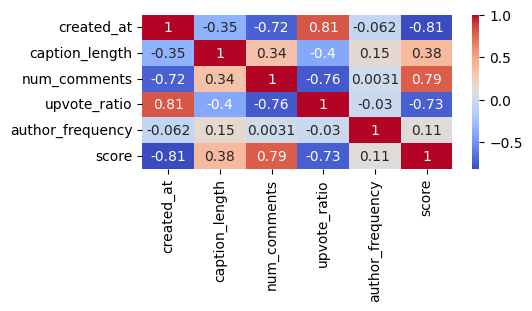

In [ ]:



cm_e = df_e.corr()
cm_p = df_p.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(5,2))
sns.heatmap(cm_e, annot=True, cmap='coolwarm')
# sns.heatmap(cm_e, annot=True, cmap='coolwarm')
plt.show()
# sns.heatmap(cm_e, annot=True, cmap='coolwarm')
# files.download('myplot.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

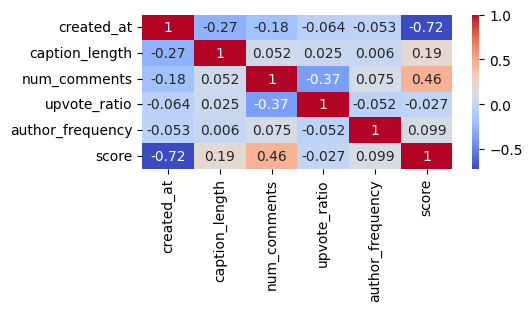

In [ ]:
plt.figure(figsize=(5, 2))
sns.heatmap(cm_p, annot=True, cmap='coolwarm')
# sns.heatmap(cm_e, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
import matplotlib.dates as mdates


def time_submission_pattern(df):
    df= df.copy()
    df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
    sns.displot(df['created_at'].dt.hour, kde=True, bins=24, color='blue')
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.xticks(range(24))
    plt.show()


def title_length(df):
  sns.distplot(df['caption_length'])
  plt.title('Title length', fontsize=12)
  plt.xlabel('Length', fontsize=10)
  plt.ylabel('Probability Density', fontsize=10)
  plt.show()

def most_active_authors(df):
# group the dataframe by author and count the number of posts
  author_posts = df.groupby('author').size().reset_index(name='post_count')

# sort the authors by their post count
  author_posts = author_posts.sort_values(by='post_count', ascending=False)

# plot a bar chart of the top 10 authors by post count
  plt.figure(figsize=(6,2))
  sns.barplot(x='post_count', y='author', data=author_posts.head(10))
  plt.xlabel('Number of Posts')
  plt.ylabel('Author')
  plt.title('Top 10 Users by Number of Posts')
  plt.show()

def most_popular_authors(df):
# group the dataframe by author and count the number of posts and sum the scores
  author_stats = df.groupby('author').agg({'score': 'sum', 'title': 'count'})

# sort the scores in descending order and select the top 10 users
  top_authors = author_stats.sort_values(by='score', ascending=False)[:10]

# create the bar chart using Seaborn
  fig, ax = plt.subplots(figsize=(6, 2))
  sns.barplot(x='score', y=top_authors.index, data=top_authors)

# set the labels and title
  ax.set_xlabel('Total Score')
  ax.set_ylabel('Author')
  ax.set_title('Top 10 Users by Total Score')

# display the plot
  plt.show()

def most_frequent_words(df):
  stop_words = set(['NOC', 'Chart', 'Bar', 'Created', 'Confirmed', 'How', 'can', 'the'])
  stopwords = STOPWORDS.update(stop_words)
  plt.figure(figsize=(8, 8))
  wc_1 = WordCloud(width=800, height=400, background_color='black', stopwords=STOPWORDS,
                 max_words=1000, min_word_length=3, min_font_size=3).generate(str(' '.join(df.title.values)))

  plt.imshow(wc_1, interpolation='bilinear')
  plt.axis('off')
  plt.title('Most frequent words in Titles', fontsize=10, verticalalignment='bottom')
  plt.tight_layout(pad=0)
  plt.show()

In [ ]:
# time_submission_pattern(df_pics)
# title_length(df_pics)
# most_active_authors(df_pics)
# most_popular_authors(df_pics)
# most_frequent_words(df_pics)
print(df_pics.shape)
print(df_earth.shape)

(2000, 22)
(2000, 22)


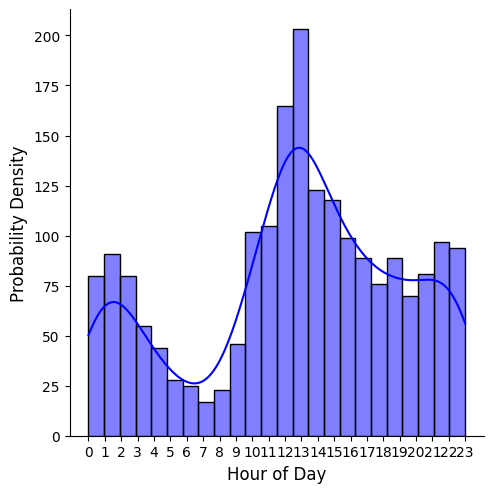

<ipython-input-88-9f34f21754fc>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['caption_length'])


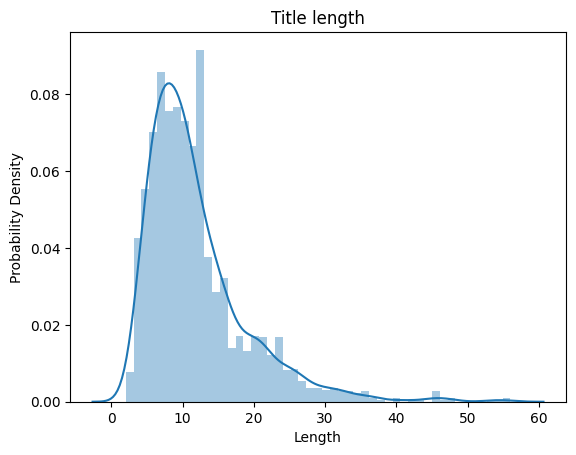

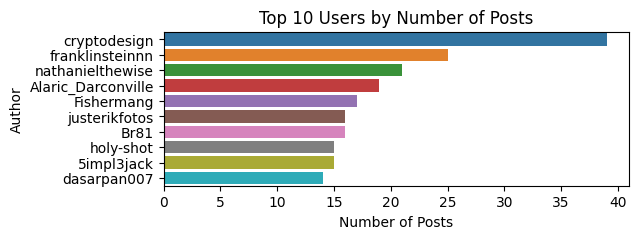

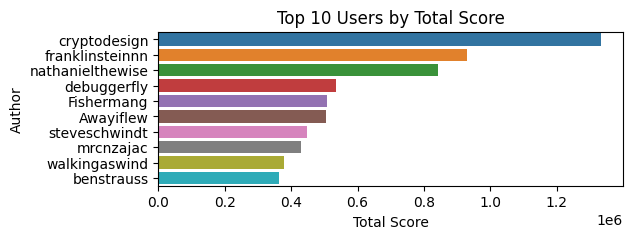

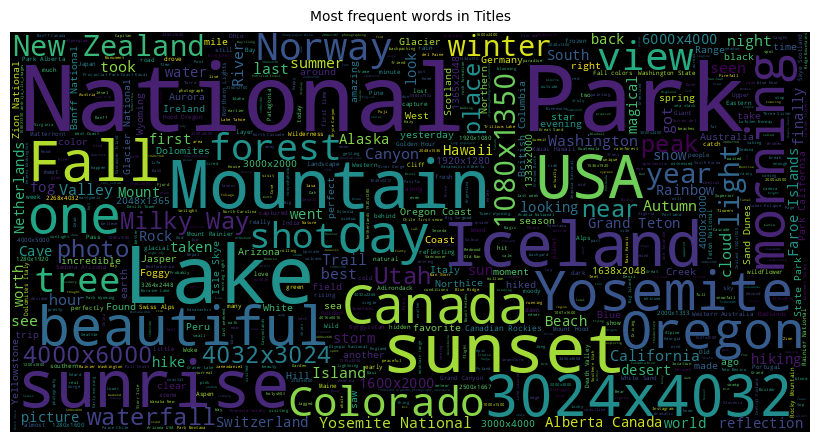

In [ ]:
time_submission_pattern(df_earth)
title_length(df_earth)
most_active_authors(df_earth)
most_popular_authors(df_earth)
most_frequent_words(df_earth)

In [ ]:
import cv2

resized_images = []
for image in image_array:
    resized_image = cv2.resize(image, (150, 150), interpolation = cv2.INTER_LINEAR)
    resized_images.append(resized_image)
r_images= np.array(resized_images)

In [ ]:
!unzip efficientnetb0.zip


Archive:  efficientnetb0.zip
  inflating: efficientnetb0/0.jpg    
  inflating: efficientnetb0/1.jpg    
  inflating: efficientnetb0/10.jpg   
  inflating: efficientnetb0/100.jpg  
  inflating: efficientnetb0/1000.jpg  
  inflating: efficientnetb0/1001.jpg  
  inflating: efficientnetb0/1002.jpg  
  inflating: efficientnetb0/1003.jpg  
  inflating: efficientnetb0/1004.jpg  
  inflating: efficientnetb0/1005.jpg  
  inflating: efficientnetb0/1006.jpg  
  inflating: efficientnetb0/1007.jpg  
  inflating: efficientnetb0/1008.jpg  
  inflating: efficientnetb0/1009.jpg  
  inflating: efficientnetb0/101.jpg  
  inflating: efficientnetb0/1010.jpg  
  inflating: efficientnetb0/1011.jpg  
  inflating: efficientnetb0/1012.jpg  
  inflating: efficientnetb0/1013.jpg  
  inflating: efficientnetb0/1014.jpg  
  inflating: efficientnetb0/1015.jpg  
  inflating: efficientnetb0/1016.jpg  
  inflating: efficientnetb0/1017.jpg  
  inflating: efficientnetb0/1018.jpg  
  inflating: efficientnetb0/1019.jpg  
 

In [ ]:
# define models and their respective input sizes
models = {
    'vgg16': (224, 224),
    'vgg19': (224, 224),
    'resnet50': (224, 224),
    'inceptionv3': (299, 299),
    'inceptionresnetv2': (299, 299),
    'xception': (299, 299),
    'efficientnetb0': (224, 224),
    'efficientnetb3': (300, 300)
}

In [ ]:
import os
import cv2
import numpy as np

def load_resized_images(model_name, folder_path):
    input_size = models[model_name]
    images = []
    for filename in sorted(os.listdir(folder_path), key=lambda x: int(os.path.splitext(x)[0])):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                # Convert BGR to RGB color space
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                resized_img = cv2.resize(img, input_size)
                images.append(resized_img)
    return np.array(images)



In [ ]:
# effnetb3 = load_resized_images('efficientnetb3', 'efficientnetb3')
effnetb0 = load_resized_images('efficientnetb0', 'efficientnetb0')
# xception = load_resized_images('xception', 'xception')

In [ ]:
df_pics = pd.read_csv("pics_final_for_model.csv")
df_earth = pd.read_csv("earth_final_for_model.csv")
# df_pics.head(2)

In [ ]:
def empty_columns(df):
  df = df
  for col in df.columns:
    is_column_empty = df[col].isna().all()
    is_column_constant = df[col].nunique() == 1
    if is_column_empty:
        print(f"The '{col}' column is completely empty.")
    elif is_column_constant:
        print(f"The '{col}' column has the same value throughout.")
    else:
        pass

empty_columns(df_pics)
print("\n")
empty_columns(df_earth)

def extract_arrays(df):
  title = df_pics['title'].values
  score = df['score'].values
  log_score = df['log_score'].values
  np.save('caption_pics.npy', title)
  np.save('score_pics.npy', score)
  np.save('log_score_pics.npy', log_score)

import pandas as pd
from sklearn.preprocessing import LabelEncoder


def label_encode_column(df, column_name, default_value='unknown'):
    # Replace missing values with the default value
    df[column_name].fillna(default_value, inplace=True)

    # Instantiate the label encoder
    le = LabelEncoder()

    # Fit and transform the column
    encoded_column = le.fit_transform(df[column_name])

    # Replace the original column with the encoded column
    df[column_name] = encoded_column

    return df

import pandas as pd

def replace_missing_with_zero(df, column):

    df[column].fillna(0, inplace=True)
    return df



def replace_boolean_with_binary(df, boolean_col):
    # Replace True/False values with 1/0
    df[boolean_col] = df[boolean_col].replace({True: 1, False: 0 , None : -1})

    return df


def drop_columns(df):
  df= df
  col =  ['author','created_at','id','author_flair_text', 'distinguished' ,'is_self' , 'selftext' , 'is_spoiler' , 'subreddit' , 'is_stickied' , 'is_edited', 'url', 'num_comments','upvote_ratio' ]
  df.drop(columns=col, axis=1, inplace=True)
  return df

# df_pics = drop_columns(df_pics)
# df_earth = drop_columns(df_earth)



The 'author_flair_text' column is completely empty.
The 'distinguished' column is completely empty.
The 'is_self' column has the same value throughout.
The 'selftext' column is completely empty.
The 'is_spoiler' column has the same value throughout.
The 'subreddit' column has the same value throughout.
The 'is_stickied' column has the same value throughout.
The 'is_edited' column has the same value throughout.


The 'distinguished' column is completely empty.
The 'is_self' column has the same value throughout.
The 'selftext' column is completely empty.
The 'subreddit' column has the same value throughout.
The 'is_stickied' column has the same value throughout.
The 'is_edited' column has the same value throughout.


In [ ]:
import datetime
import time

unix_timestamp = df_earth['created_at'][1]
# UTC datetime
utc_datetime = datetime.datetime.utcfromtimestamp(unix_timestamp)  # Replace with your UTC datetime

# Convert to time object
time_obj = utc_datetime.time()

# Convert to seconds of the day
seconds_of_day = int(unix_timestamp % 86400)

# Print the seconds of the day
print(seconds_of_day)

def unix_to_hour(unix_timestamp):
    # Calculate the seconds during the day
    seconds = (unix_timestamp%86400)
    # Return the number of seconds
    # print(seconds)
    return seconds

# Example usage
unix_timestamp = 1683676800  # Unix timestamp representing May 19, 2021, 00:00:00 UTC

# Convert Unix timestamp to seconds during the day
seconds = unix_to_hour(unix_timestamp)

print(f"The Unix timestamp {unix_timestamp} is equivalent to {seconds} seconds during the day.")




46338
The Unix timestamp 1683676800 is equivalent to 0 seconds during the day.


(2000,)
(2000,)


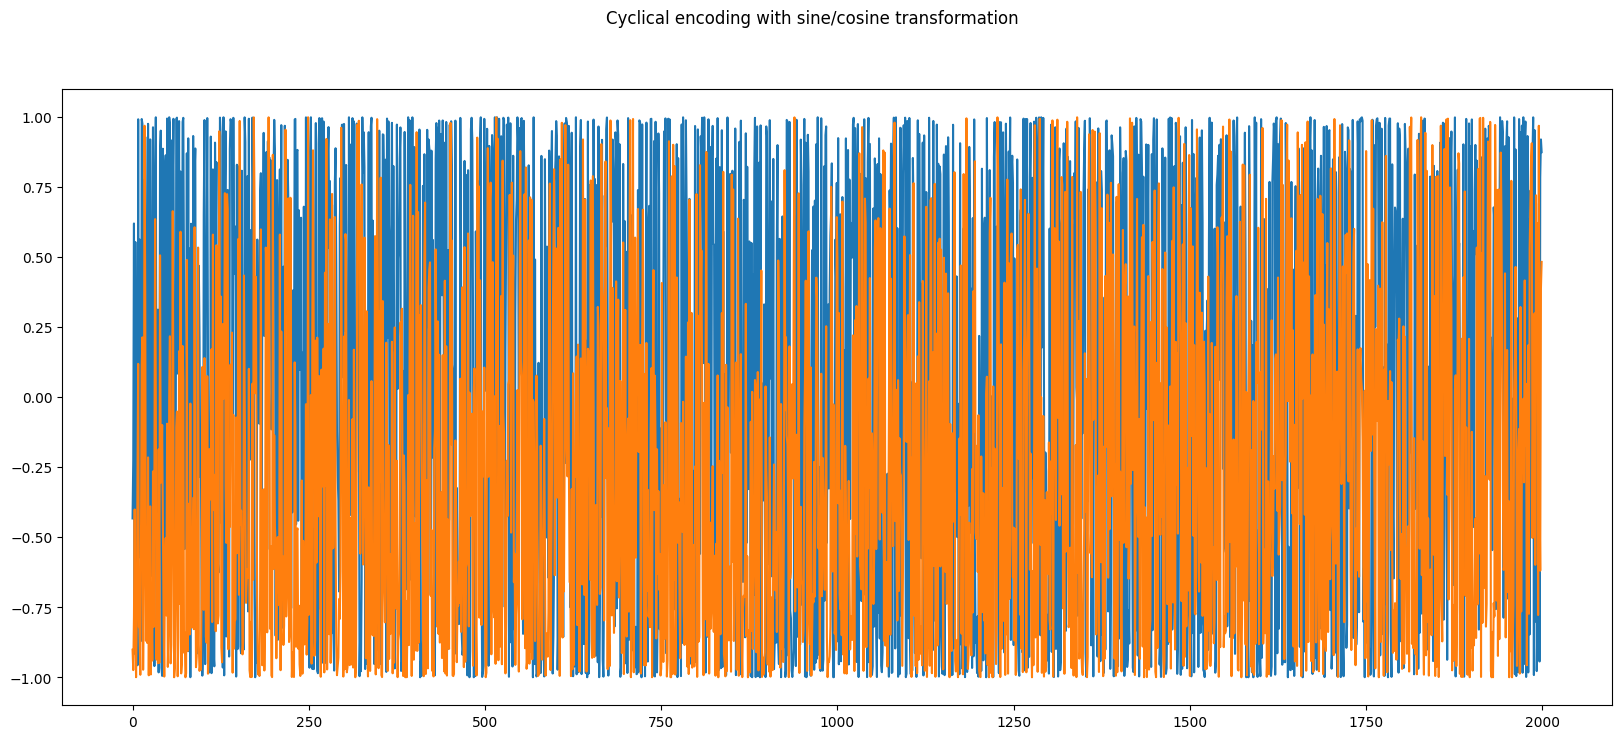

In [ ]:
def sin_transformer(x,period):
  y = np.sin(x / period * 2 * np.pi)
  # print(y)
  return y

def cos_transformer(x,period):
    y= np.cos(x / period * 2 * np.pi)
    # print(y)
    return y




X_2= sin_transformer(unix_to_hour(df_pics['created_at']),86400)
X_1= cos_transformer(unix_to_hour(df_pics['created_at']),86400)

df_pics.insert(21, "sin_posted_at", X_2, True)
df_pics.insert(21, "cos_posted_at", X_1, True)

y_2= sin_transformer(unix_to_hour(df_earth['created_at']),86400)
y_1= cos_transformer(unix_to_hour(df_earth['created_at']),86400)

df_earth.insert(21, "sin_posted_at", y_2, True)
df_earth.insert(21, "cos_posted_at", y_1, True)

print(X_2.shape)
print(X_1.shape)

# X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
# X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(X_1)
ax.plot(X_2)
# X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation")
plt.show()

In [ ]:
print(df_pics.shape)
print(df_earth.shape)
df_pics.head()

(2000, 25)
(2000, 25)


,id,title,caption_length,author,author_frequency,author_flair_text,created_at,url,flair,is_original_content,...,subreddit,is_stickied,is_edited,is_locked,num_comments,upvote_ratio,cos_posted_at,sin_posted_at,score,log_score
0,haucpf,I’ve found a few funny memories during lockdow...,19,ReallyRickAstley,3.0,NaN,1.592411e+09,https://i.redd.it/f58v4g8mwh551.jpg,NaN,True,...,pics,False,False,False,19096,0.99,-0.432676,-0.901550,438830,12.991867
1,fi2zjs,If this is you: Fuck you,6,onyxandcake,1.0,NaN,1.584119e+09,https://i.redd.it/b9hkx5md2hm41.jpg,NaN,False,...,pics,False,False,False,15736,0.96,-0.225022,-0.974354,272005,12.513576
2,61ns2w,"Private Internet Access, a VPN provider, takes...",21,pdmcmahon,2.0,NaN,1.490560e+09,http://i.imgur.com/GJYYNle.jpg,NaN,False,...,pics,False,False,False,8625,0.96,0.620692,-0.784055,258412,12.462310
3,gzn8tj,At a protest in Arizona,5,Theon_Graystark,1.0,NaN,1.591710e+09,https://i.redd.it/v8y89qbj0w351.jpg,Protest,False,...,pics,False,False,False,11752,0.96,-0.916217,-0.400682,255629,12.451482
4,l77fdv,"Twelve years ago, the world was bankrupted and...",13,a-horse-has-no-name,2.0,NaN,1.611865e+09,https://i.redd.it/f8w05ja8s4e61.png,NaN,False,...,pics,False,False,False,6694,0.95,0.554421,-0.832236,249886,12.428760


In [ ]:
df_pics= label_encode_column(df_pics, 'flair')
df_earth= label_encode_column(df_earth, 'flair')

df_pics= replace_missing_with_zero(df_pics, 'author_frequency')
df_earth= replace_missing_with_zero(df_earth, 'author_frequency')

# df_pics= normalize_unix_time(df_pics, 'created_at')
# df_earth= normalize_unix_time(df_earth, 'created_at')

df_pics= replace_boolean_with_binary(df_pics, 'is_over_18')
df_earth= replace_boolean_with_binary(df_earth, 'is_over_18')

df_pics= replace_boolean_with_binary(df_pics, 'is_original_content')
df_earth= replace_boolean_with_binary(df_earth, 'is_original_content')

df_pics= replace_boolean_with_binary(df_pics, 'is_locked')
df_earth= replace_boolean_with_binary(df_earth, 'is_locked')

df_pics = drop_columns(df_pics)
df_earth = drop_columns(df_earth)




In [ ]:
df_pics.head()
# print(df_pics.shape)

,title,caption_length,author_frequency,flair,is_original_content,is_over_18,is_locked,cos_posted_at,sin_posted_at,score,log_score
0,I’ve found a few funny memories during lockdow...,19,3.0,39,1,0,0,-0.432676,-0.901550,438830,12.991867
1,If this is you: Fuck you,6,1.0,39,0,0,0,-0.225022,-0.974354,272005,12.513576
2,"Private Internet Access, a VPN provider, takes...",21,2.0,39,0,0,0,0.620692,-0.784055,258412,12.462310
3,At a protest in Arizona,5,1.0,28,0,0,0,-0.916217,-0.400682,255629,12.451482
4,"Twelve years ago, the world was bankrupted and...",13,2.0,39,0,0,0,0.554421,-0.832236,249886,12.428760


In [ ]:
def extract_arrays(df):
  title = df_pics['title'].values
  score = df['score'].values
  log_score = df['log_score'].values
  np.save('caption_earth.npy', title)
  np.save('score_earth.npy', score)
  np.save('log_score_earth.npy', log_score)

extract_arrays(df_earth)

In [ ]:
print(df_earth.shape)
print(df_pics.shape)

df_pics.to_csv('pics_final_model.csv', index=False)
df_earth.to_csv('earth_final_model.csv', index=False)

(2000, 11)
(2000, 11)


In [ ]:
score_pics = df_pics['log_score'].values
score_earth = df_earth['log_score'].values
caption_pics = df_pics['title'].values
caption_earth = df_earth['title'].values
print(score_pics[0])#





12.991867373323329


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 19.4 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, RobertaTokenizer, GPT2Tokenizer
import pandas as pd

# Load the Reddit captions data
pics = 'pics_final_for_model.csv'
earth = 'earth_final_for_model.csv'

df = pd.read_csv(pics)

# Initialize the tokenizers
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Tokenize each caption separately and find the maximum sequence length
max_lengths = {}

# BERT tokenizer
max_length = 0
for caption in df['title']:
    input_ids = bert_tokenizer.encode(caption, add_special_tokens=True)
    max_length = max(max_length, len(input_ids))
max_lengths['BERT'] = max_length

# RoBERTa tokenizer
max_length = 0
for caption in df['title']:
    input_ids = roberta_tokenizer.encode(caption, add_special_tokens=True)
    max_length = max(max_length, len(input_ids))
max_lengths['RoBERTa'] = max_length

# GPT-2 tokenizer
max_length = 0
for caption in df['title']:
    input_ids = gpt2_tokenizer.encode(caption)
    # print(input_ids)
    max_length = max(max_length, len(input_ids))
max_lengths['GPT-2'] = max_length

# Print the maximum sequence length for each tokenizer
print(f'Pics : {max_lengths}')


Pics : {'BERT': 75, 'RoBERTa': 77, 'GPT-2': 75}


In [ ]:
# Shuffle the indices using numpy's permutation function
indices = np.random.permutation(len(score_pics))

# Use the shuffled indices to shuffle the images and scores arrays
# images = images[indices]
scores = score_pics[indices]
title = caption_pics[indices]

In [ ]:
df_pics = pd.read_csv("pics_final_for_model.csv")
df_earth = pd.read_csv("earth_final_for_model.csv")
df_pics_model = pd.read_csv("pics_final_model.csv")
df_earth_model = pd.read_csv("earth_final_model.csv")

In [ ]:
df_pics_model.head(2)

,caption_length,author_frequency,flair,is_original_content,is_over_18,is_locked
0,19,3.0,39,1,0,0
1,6,1.0,39,0,0,0


In [ ]:
input_images = effnetb0
input_scores = score_pics
print(input_images.shape)

(2000, 224, 224, 3)
